## Load data


In [3]:
%matplotlib inline 
%reload_ext autoreload
from notebooks_commons import get_raw_data

# index = "ilias-mlr-500cars-median-verify"
# index = "ilias-random-500cars-median-verify"
# index = "ilias-nsga2-500cars-median-verify"
# index = "ilias-novelty-500cars-median-verify"

# index = "ilias-mlr-700cars-median" 
# index = "ilias-random-700cars-median-verify"
# index = "ilias-nsga2-700cars-median-verify"
# index = "ilias-novelty-700cars-median-verify"

# index = "ilias-mlr-800cars-median" 
# index = "ilias-random-800cars-median-verify"
# index = "ilias-nsga2-800cars-median-verify"
# index = "ilias-novelty-800cars-median-verify"

index = "erik-noveltysearch-800cars-median" 

print "Reading from index " + index

# The first time we want to download the data from an index (might take a while!), 
# we should put the next parameter to True. Then, we can set it to False to read the saved
# data from the local pickle file.
pair = get_raw_data(index, True)
rtx_runs = pair[0]
data     = pair[1] 

Reading from index erik-noveltysearch-800cars-median
> OEDA configuration: Using elasticsearch database.
data saved to file raw_data/erik-noveltysearch-800cars-median.pickle


## Check what's in there

In [8]:
import pprint
from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
pp = pprint.PrettyPrinter(indent=4)

# sort according to seed 
rtx_runs.sort(key=lambda d : d["seed"])
print "There were " + str(len(rtx_runs)) + " runs performed."

for rtx_run in rtx_runs:
    data_for_run = [d for d in data if d["parent"] == rtx_run["id"]]
    data_for_run.sort(key=lambda d : (d["_source"]["iteration"], d["_source"]["individual"]))
    printmd(str(len(data_for_run)) + "\t\t| seed " + str(rtx_run["seed"]) + " | id " + str(rtx_run["id"]), "red")


There were 10 runs performed.


<span style='color:red'>100		| seed 1 | id AWiPNfMIMEaT9KPSnBUv</span>

<span style='color:red'>100		| seed 2 | id AWiPNhn2MEaT9KPSnBXb</span>

<span style='color:red'>100		| seed 3 | id AWiPNkEgMEaT9KPSnBaH</span>

<span style='color:red'>100		| seed 4 | id AWiPNmg2MEaT9KPSnBcz</span>

<span style='color:red'>100		| seed 5 | id AWiPNo-LMEaT9KPSnBff</span>

<span style='color:red'>100		| seed 6 | id AWiPNrakMEaT9KPSnBiL</span>

<span style='color:red'>100		| seed 7 | id AWiPNt3vMEaT9KPSnBk3</span>

<span style='color:red'>26		| seed 8 | id AWiPNwYRMEaT9KPSnBnj</span>

<span style='color:red'>100		| seed 9 | id AWiPNyxdMEaT9KPSnBqP</span>

<span style='color:red'>100		| seed 10 | id AWiPN1O1MEaT9KPSnBs7</span>

## Find convergence points

100
{0: 1.9165622973594276, 1: 1.7630910946938563, 2: 1.7699468339878437, 3: 1.8236118438962698, 4: 1.7979504015492198, 5: 1.7591471102271323, 6: 1.7927619934819241, 7: 1.8249204069039355, 8: 1.8172637486339056, 9: 1.7958236971225117, 10: 1.7805288758184725, 11: 1.8402018787436063, 12: 1.7988831303967951, 13: 1.7901290653968267, 14: 1.7445088417672978, 15: 1.7996673330296937, 16: 1.7933637302178478, 17: 1.7547264866328904, 18: 1.8223809749670277, 19: 1.8048781096810242, 20: 1.802058198602257, 21: 1.7739470991062647, 22: 1.7872763199339656, 23: 1.7843936489448209, 24: 1.8750377837922827, 25: 1.7894121861900494, 26: 1.7780061570286474, 27: 1.8292303312987561, 28: 1.780720504412856, 29: 1.7736937898988141, 30: 1.7940941736870357, 31: 1.8283398775263715, 32: 1.7837769032145407, 33: 1.7758228971767378, 34: 1.7811903003254779, 35: 1.8050782242760814, 36: 1.7692387492861679, 37: 1.7468236951203435, 38: 1.762119104894923, 39: 1.8159153391418785, 40: 1.7909297241307003, 41: 1.7672567808705186, 

{0: 1.7954745221518635, 1: 1.7947735277242107, 2: 1.8360982669373254, 3: 1.7832845332219371, 4: 1.8248280993291239, 5: 1.7817514625505795, 6: 1.7515427758211846, 7: 1.7881155770448982, 8: 1.7863984352255691, 9: 1.8033951101776686, 10: 1.7767223603922564, 11: 1.8275273137227022, 12: 1.7879463608851061, 13: 1.8530172161277689, 14: 1.7685803689677171, 15: 1.7589382096524213, 16: 1.7933733234414881, 17: 1.7737053737033646, 18: 1.8218646816985433, 19: 1.8041631360048909, 20: 1.7989587439593882, 21: 1.7860355589413863, 22: 1.8080372280702024, 23: 1.811287057121588, 24: 1.8056420447940646, 25: 1.7817461239051831, 26: 1.7438064178256234, 27: 1.7910590289210948, 28: 1.7938113904685302, 29: 1.8372358681425507, 30: 1.7783586237657647, 31: 1.7912757242674997, 32: 1.7972190375923289, 33: 1.805910970833517, 34: 1.8267812007168192, 35: 1.8143614409497626, 36: 1.7887861075261939, 37: 1.8061499629533049, 38: 1.7688024378099272, 39: 1.8330298501752731, 40: 1.7904528258786843, 41: 1.7916559722241669, 42:

{0: 1.7799123850087788, 1: 1.7424848271343027, 2: 1.7983696859139526, 3: 1.7926169769453004, 4: 1.7751544577900822, 5: 1.7807717815628137, 6: 1.8269905242102544, 7: 1.7968717749559691, 8: 1.7669331005259172, 9: 1.7967963786215391, 10: 1.7601934799313066, 11: 1.7628545254204087, 12: 1.8397026898643147, 13: 1.7704482473181811, 14: 1.8296004580498553, 15: 1.7831748485384182, 16: 1.7907073403514471, 17: 1.7729064780372548, 18: 1.7971027668304371, 19: 1.8173630266096119, 20: 1.7943735205176039, 21: 1.7787805857790051, 22: 1.7713178170502557, 23: 1.7771170264236225, 24: 1.7934308808296417, 25: 1.8252501104169525, 26: 1.7702495788697081, 27: 1.7703797038731732, 28: 1.8347272856271666, 29: 1.791494839884431, 30: 1.839630560145693, 31: 1.7667798274282722, 32: 1.7826633498015358, 33: 1.7642940492638362, 34: 1.780806091267497, 35: 1.8419751676792613, 36: 1.8038590414302911, 37: 1.7695710106803086, 38: 1.9020280638885145, 39: 1.7354982172651308, 40: 1.7735515897656624, 41: 1.8172221819311147, 42: 

{0: 1.7920312543886314, 1: 1.8250543169856148, 2: 1.7750533825049664, 3: 1.8117066457242934, 4: 1.8065279452986605, 5: 1.7933620989041872, 6: 1.8096884514679852, 7: 1.8057206704663491, 8: 1.79109594958735, 9: 1.7590477740587149, 10: 1.7772105211784754, 11: 1.793911295732304, 12: 1.8247808376168839, 13: 1.8466629393997995, 14: 1.775036926490684, 15: 1.8154630107055065, 16: 1.772330218674623, 17: 1.77834665222445, 18: 1.7907675979472453, 19: 1.7794574656570301, 20: 1.8806373650613688, 21: 1.7962996129655959, 22: 1.8125542156599233, 23: 1.790525677052035, 24: 1.8786127161368014, 25: 1.8022096601166087, 26: 1.7526616802036472, 27: 1.8359565758375771, 28: 1.7665099063542304, 29: 1.8062832131909523, 30: 1.8214912521138715, 31: 1.7961407997779737, 32: 1.878543482434553, 33: 1.7913562732686485, 34: 1.8563597099989628, 35: 1.7800053941512903, 36: 1.7921260786694646, 37: 1.8478617655120437, 38: 1.7791742091089064, 39: 1.7860358678155128, 40: 1.8240155666571889, 41: 1.7701611235429677, 42: 1.8051

{0: 1.7885186582823216, 1: 1.7608163073238663, 2: 1.7402265433172797, 3: 1.7638375598005722, 4: 1.7419946061880167, 5: 1.757059936688387, 6: 1.7843431694823113, 7: 1.7544724469949127, 8: 1.7578710209872894, 9: 1.769580230365289, 10: 1.8128662484847728, 11: 1.756941068578844, 12: 1.7513301950295426, 13: 1.7632708823818339, 14: 1.8391729599704028, 15: 1.7985461937180109, 16: 1.7758388880766651, 17: 1.7825903845699689, 18: 1.7847617479830122, 19: 1.7858032957900665, 20: 1.8010608891306576, 21: 1.9145379972101986, 22: 1.7433738138258978, 23: 1.7852693532558892, 24: 1.8647015617297529, 25: 1.7522220945848677, 26: 1.7849093193713248, 27: 1.7686440049801153, 28: 1.8345311760962424, 29: 1.858010725000671, 30: 1.7766319089606899, 31: 1.8123791766243769, 32: 1.8051153203862726, 33: 1.7742734302309724, 34: 1.8355627495338667, 35: 1.8032480210120367, 36: 1.8117206193175457, 37: 1.7700823871813502, 38: 1.8351208414605702, 39: 1.7980789577380434, 40: 1.7969849875948944, 41: 1.7827351483146701, 42: 1

{0: 1.7878386602239913, 1: 1.7966845692926294, 2: 1.7763395232935868, 3: 1.788828104734977, 4: 1.8510981972166431, 5: 1.8036787548803774, 6: 1.7983265760679588, 7: 1.799371895359223, 8: 1.7743032562424461, 9: 1.7695802389085737, 10: 1.7638459946774048, 11: 1.7535267816767461, 12: 1.799246982470734, 13: 1.7809346083717006, 14: 1.7987349079205779, 15: 1.7743924791304981, 16: 1.7666471917677034, 17: 1.8093338899812166, 18: 1.8458850394897872, 19: 1.7399615521301199, 20: 1.7979391875191422, 21: 1.8177513378953234, 22: 1.7773062175335428, 23: 1.7668890658618348, 24: 1.7720786832686302, 25: 1.7445724610630051, 26: 1.8024238037477547, 27: 1.7828538175472208, 28: 1.7756884348682964, 29: 1.7563592023851422, 30: 1.7941917532427423, 31: 1.7736095565464831, 32: 1.7745605403794642, 33: 1.776397599710583, 34: 1.8019576704902567, 35: 1.772935139689011, 36: 1.7987192191440278, 37: 1.7512581312570816, 38: 1.7924810037498675, 39: 1.7732327383783755, 40: 1.7939228247463743, 41: 1.8012532616431802, 42: 1.

{0: 1.7928986877867632, 1: 1.7869777235107243, 2: 1.7673101377387239, 3: 1.7923526246356232, 4: 1.7847752319833246, 5: 1.8348864233662454, 6: 1.7630604383812751, 7: 1.7773819803765574, 8: 1.766835707539141, 9: 1.7699374893372881, 10: 1.7881216814609899, 11: 1.764748802559307, 12: 1.7363171287257246, 13: 1.7614152421023748, 14: 1.7582474697454515, 15: 1.7832902868079683, 16: 1.788999827621397, 17: 1.8013036818981527, 18: 1.7844813749643995, 19: 1.7591625463817, 20: 1.7633329112773113, 21: 1.7490226526148167, 22: 1.7744847440526959, 23: 1.8582361777198049, 24: 1.7764066036712887, 25: 1.78509827907117, 26: 1.7767856595976992, 27: 1.777424478880913, 28: 1.7821165177209186, 29: 1.7680781447232861, 30: 1.7559249973496229, 31: 1.8054706145807726, 32: 1.7761205297610774, 33: 1.7966133734435374, 34: 1.795098601357481, 35: 1.7884038483429343, 36: 1.8119243529460156, 37: 1.7706805686581355, 38: 1.7849892797261706, 39: 1.7722677329850238, 40: 1.8132162347942729, 41: 1.7935089457886111, 42: 1.79223

{0: 1.7590747689886272, 1: 1.7881322757987208, 2: 1.7550199752974656, 3: 1.772158477427523, 4: 1.7949095247395908, 5: 1.8074876112279541, 6: 1.7970005888558969, 7: 1.7622497678042659, 8: 1.7973540932519674, 9: 1.8384299583265202, 10: 1.7476306072236836, 11: 1.8002942276418874, 12: 1.7933296338337232, 13: 1.7575287861478497, 14: 1.7577499158564318, 15: 1.773353504621169, 16: 1.7681795140129903, 17: 1.804955924307734, 18: 1.7878229767634526, 19: 1.8500346209864604, 20: 1.7957095155409144, 21: 1.7543103630057693, 22: 1.8026046708571077, 23: 1.8071499985823196, 24: 1.7666602164593093, 25: 1.8085689635506372, 26: 1.8171790115485604, 27: 1.7763724265692862, 28: 1.7906967641293383, 29: 1.7671133799905037, 30: 1.7657865599518177, 31: 1.7833516649528298, 32: 1.7532620680127551, 33: 1.8152628539852831, 34: 1.7716742716194573, 35: 1.7611124465963688, 36: 1.7738252748476331, 37: 1.7686056916075563, 38: 1.8173040314763385, 39: 1.8000105897056238, 40: 1.8242352370433705, 41: 1.8070576134927505, 42: 

{0: 1.8282984626461518, 1: 1.8012756447332321, 2: 1.7760696232695372, 3: 1.7756581668056475, 4: 1.7714350360445548, 5: 1.7665641805415568, 6: 1.7614341703655592, 7: 1.7732375350301486, 8: 1.8087762467882873, 9: 1.8192057081612583, 10: 1.7570779686981877, 11: 1.7846425574601483, 12: 1.7722099797719744, 13: 1.7557285171277559, 14: 1.8342885245429483, 15: 1.7520509015566632, 16: 1.7968859398291555, 17: 1.8038622811974638, 18: 1.7626723054812667, 19: 1.764714016003043, 20: 1.7729563016468943, 21: 1.8028555507001642, 22: 1.7939983210867998, 23: 1.745383512584801, 24: 1.7639462351646267, 25: 1.786662528224702, 26: 1.7666963115532897, 27: 1.8277101100805528, 28: 1.788225671286751, 29: 1.7892280833331431, 30: 1.801062523540941, 31: 1.7924476359253863, 32: 1.8239860597132886, 33: 1.7522220307042797, 34: 1.7572152800370631, 35: 1.8406883981657254, 36: 1.7710583433627427, 37: 1.814866889212541, 38: 1.8042846169958255, 39: 1.8459445888514667, 40: 1.76682559745307, 41: 1.8144567211284863, 42: 1.796

{0: 1.8112388149870071, 1: 1.7733756392384625, 2: 1.8578272852479947, 3: 1.7850284481945982, 4: 1.7438466081708837, 5: 1.8447432395336523, 6: 1.799312488399629, 7: 1.7926134872959942, 8: 1.7748652227285466, 9: 1.7715462775517505, 10: 1.8136060557978424, 11: 1.774177127211251, 12: 1.7841741738879409, 13: 1.7792761069665122, 14: 1.7938032349763546, 15: 1.776339516568642, 16: 1.7572612343672742, 17: 1.7557621521789508, 18: 1.7793512357592269, 19: 1.7919818259572395, 20: 1.7740773403322212, 21: 1.7583202301921141, 22: 1.7903473724974326, 23: 1.8276605414053788, 24: 1.7678671835053437, 25: 1.7804375182042991, 26: 1.7919791892583359, 27: 1.835415042225099, 28: 1.7938660936104796, 29: 1.7496513205063595, 30: 1.7811265150132343, 31: 1.7866806715054977, 32: 1.832262255986798, 33: 1.77387676169658, 34: 1.797672701693364, 35: 1.7777082732422445, 36: 1.8061505257726327, 37: 1.8029812901348894, 38: 1.7977594132617014, 39: 1.7478477183234546, 40: 1.7670421162678234, 41: 1.8081117098986106, 42: 1.774

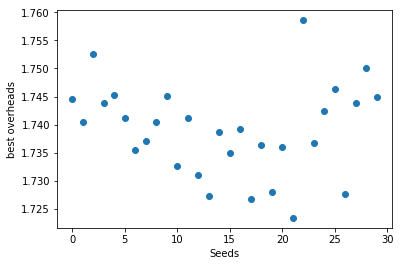

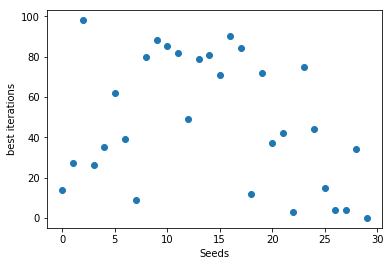

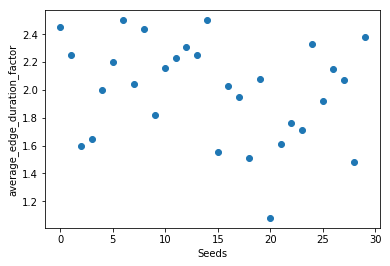

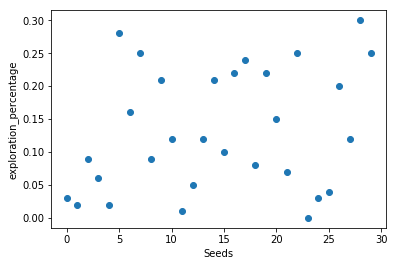

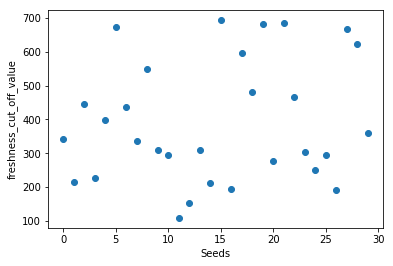

In [ ]:
import matplotlib.pyplot as plt
from numpy import var, std, mean, median
import matplotlib as mpl
mpl.rc("savefig", dpi=450)
import pprint

pp = pprint.PrettyPrinter(indent=4)

iterations = 10
sample_size = 5000

bests = dict()

best_avg_overheads = list()
best_iterations = list()
best_knobs = dict()
best_knobs['average_edge_duration_factor'] = list()
best_knobs['exploration_percentage'] =       list()
best_knobs['freshness_cut_off_value'] =      list()
best_knobs['freshness_update_factor'] =      list()
best_knobs['max_speed_and_length_factor'] =  list() 
best_knobs['re_route_every_ticks'] =         list() 
best_knobs['route_random_sigma'] =           list()

for rtx_run in rtx_runs:
   
    data_for_run = [d["_source"] for d in data if d["parent"] == rtx_run["id"]]
    data_for_run.sort(key=lambda d : (d["iteration"], d["individual"]))
    
    print(len(data_for_run))
#     assert len(data_for_run) == iterations
    
    iteration_to_avg_overhead = dict()
    iteration_to_knobs_str = dict()
    iteration_to_knobs = dict()
    
    for i in range(len(data_for_run)):
        overheads_for_run = data_for_run[i]["payload"]["overheads"]
#         assert len(overheads_for_run) == sample_size
        if mean(overheads_for_run) > -1:
            iteration_to_avg_overhead[i] = mean(overheads_for_run)       
            iteration_to_knobs_str[i] = str(data_for_run[i]["knobs"])
            iteration_to_knobs[i] = data_for_run[i]["knobs"]

    iteration_of_min = min(iteration_to_avg_overhead, key=iteration_to_avg_overhead.get)
    
    print iteration_to_avg_overhead
    
    ##########################
    overheads = [d["payload"]["overheads"] for d in data_for_run]    
    avg_overheads = [mean(dataset) for dataset in overheads]   
    
#     plt.plot(range(iterations), avg_overheads, 'bo')
#     plt.ylabel('overheads of trips')
#     plt.xlabel('Iterations')
#     plt.show()
    
    #####  PARETO FRONT PLOT  ######
#     pareto_front = []
#     pareto_front.append(avg_overheads[0])
#     for j in range(1, len(avg_overheads)):
#         pareto_front.append(min(pareto_front[j-1],avg_overheads[j]))
#     fig=plt.figure(figsize=(25, 10), dpi= 80, facecolor='w', edgecolor='k')
#     plt.plot(range(iterations), pareto_front, 'o')
#     plt.xticks(range(iterations))
#     plt.grid(True)
#     plt.ylabel('overheads of trips - PARETO')
#     plt.xlabel('Iterations')
#     plt.title("SEED " + str(rtx_run["seed"]))
#     plt.show()
    
    #####  RESULTS FOR RUN  ######
    print("Run " + rtx_run["id"] + " - seed " + str(rtx_run["seed"]))
    print("Minimum average overhead: " + str(iteration_to_avg_overhead[iteration_of_min]))
    print("Found in iteration: " + str(iteration_of_min))
    print("With configuration: ")
    pp.pprint(eval(iteration_to_knobs_str[iteration_of_min]))
    print "*********************\n"
    
    best_avg_overheads.append(iteration_to_avg_overhead[iteration_of_min])
    best_iterations.append(iteration_of_min)
    
    best_knob = iteration_to_knobs[iteration_of_min]
    best_knobs['average_edge_duration_factor'].append(best_knob["average_edge_duration_factor"])
    best_knobs['exploration_percentage'].append(best_knob["exploration_percentage"])
    best_knobs['freshness_cut_off_value'].append(best_knob["freshness_cut_off_value"])
    best_knobs['freshness_update_factor'].append(best_knob["freshness_update_factor"])
    best_knobs['max_speed_and_length_factor'].append(best_knob["max_speed_and_length_factor"])
    best_knobs['re_route_every_ticks'].append(best_knob["re_route_every_ticks"])
    best_knobs['route_random_sigma'].append(best_knob["route_random_sigma"])


# fig=plt.figure(figsize=(25, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(len(rtx_runs)), best_avg_overheads, 'o')
plt.ylabel('best overheads')
plt.xlabel('Seeds')
plt.show()

# fig=plt.figure(figsize=(25, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(len(rtx_runs)), best_iterations, 'o')
plt.ylabel('best iterations')
plt.xlabel('Seeds')
plt.show()

plt.plot(range(len(rtx_runs)), best_knobs['average_edge_duration_factor'], 'o')
plt.ylabel('average_edge_duration_factor')
plt.xlabel('Seeds')
plt.show()

plt.plot(range(len(rtx_runs)), best_knobs['exploration_percentage'], 'o')
plt.ylabel('exploration_percentage')
plt.xlabel('Seeds')
plt.show()

plt.plot(range(len(rtx_runs)), best_knobs['freshness_cut_off_value'], 'o')
plt.ylabel('freshness_cut_off_value')
plt.xlabel('Seeds')
plt.show()

plt.plot(range(len(rtx_runs)), best_knobs['freshness_update_factor'], 'o')
plt.ylabel('freshness_update_factor')
plt.xlabel('Seeds')
plt.show()

plt.plot(range(len(rtx_runs)), best_knobs['max_speed_and_length_factor'], 'o')
plt.ylabel('max_speed_and_length_factor')
plt.xlabel('Seeds')
plt.show()

plt.plot(range(len(rtx_runs)), best_knobs['re_route_every_ticks'], 'o')
plt.ylabel('re_route_every_ticks')
plt.xlabel('Seeds')
plt.show()

plt.plot(range(len(rtx_runs)), best_knobs['route_random_sigma'], 'o')
plt.ylabel('route_random_sigma')
plt.xlabel('Seeds')
plt.show()

## Do some first plots - just for quick checking of a run

100


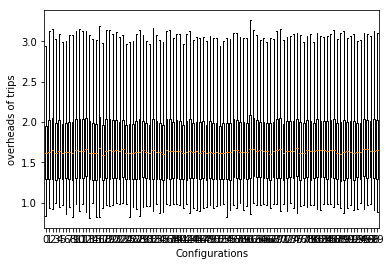

In [10]:
import matplotlib.pyplot as plt
from numpy import var, std, mean, median
import matplotlib as mpl
mpl.rc("savefig", dpi=150)

rtx_run_id = "AWg1D4Yg-DH7UHKUO4zo"
overheads = [d["_source"]["payload"]["overheads"] for d in data if d["parent"] == rtx_run_id]
print(len(overheads))

fig,ax = plt.subplots()
ax.boxplot(overheads, 0, '', positions=range(len(overheads)))
plt.ylabel('overheads of trips')
plt.xlabel('Configurations')
plt.show()